### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

2022-11-13 20:47:23.954756: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-13 20:47:25.567371: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-13 20:47:26.356648: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
!unzip -q /content/gdrive/My\ Drive/CNN_Assignment/CNN_assignment

In [ ]:
!ls

 gdrive       'Skin cancer ISIC The International Skin Imaging Collaboration'
 sample_data


In [ ]:
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


In [30]:
# Defining the path for train and test images
# Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Test")

In [31]:
# Printing the count of images in each directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [32]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [33]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [34]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [35]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### visualize one instance of all the nine classes present in the dataset

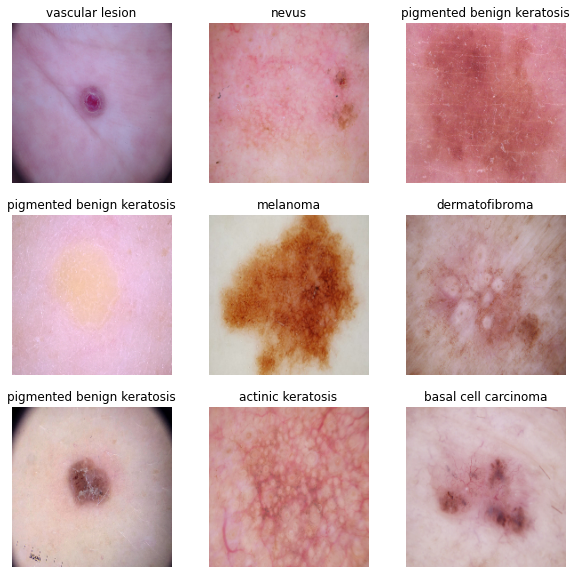

In [36]:
#using train_ds

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [40]:
### Your code goes here
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [41]:
### adam used for:  optimiser and loss function: sparse categorical Cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [43]:
## 20 epochs

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 663ms/step - loss: 2.0180 - accuracy: 0.2612 - val_loss: 1.6883 - val_accuracy: 0.4497
Epoch 2/20
56/56 [==============================] - 37s 658ms/step - loss: 1.6935 - accuracy: 0.3929 - val_loss: 1.5951 - val_accuracy: 0.4743
Epoch 3/20
56/56 [==============================] - 37s 663ms/step - loss: 1.4290 - accuracy: 0.4927 - val_loss: 1.4217 - val_accuracy: 0.5190
Epoch 4/20
56/56 [==============================] - 35s 633ms/step - loss: 1.3377 - accuracy: 0.5145 - val_loss: 1.4098 - val_accuracy: 0.5235
Epoch 5/20
56/56 [==============================] - 36s 643ms/step - loss: 1.2315 - accuracy: 0.5592 - val_loss: 1.3843 - val_accuracy: 0.5347
Epoch 6/20
56/56 [==============================] - 36s 649ms/step - loss: 1.1735 - accuracy: 0.5809 - val_loss: 1.4558 - val_accuracy: 0.5391
Epoch 7/20
56/56 [==============================] - 37s 653ms/step - loss: 1.1531 - accuracy: 0.5910 - val_loss: 1.4146 - val_accuracy: 0.5257

### Visualizing training results

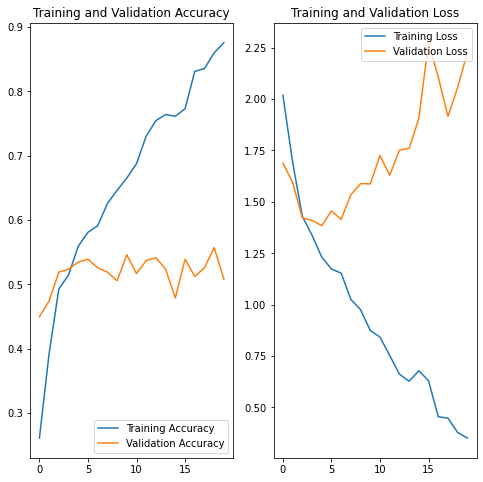

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings: overfit model due to the high training accuracy and low validation accuracy, also verified with the inverted nature of the amount of loss, training having low loss and validation having high loss since it is inaccurate.

In [45]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

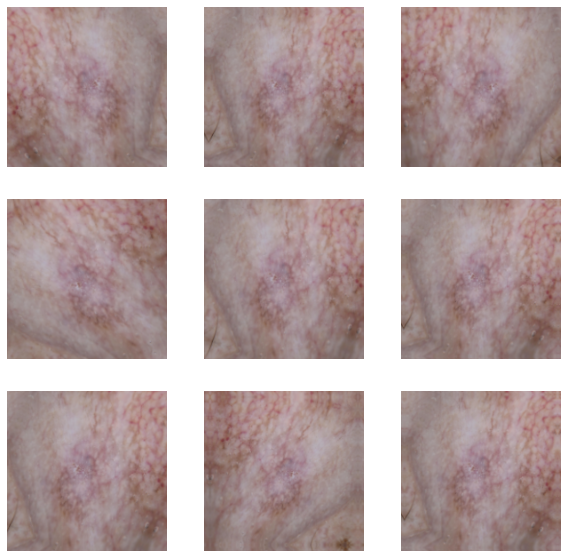

In [46]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [47]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



### Compiling the model

In [48]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [49]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 45s 793ms/step - loss: 2.0534 - accuracy: 0.2383 - val_loss: 1.9185 - val_accuracy: 0.2707
Epoch 2/20
56/56 [==============================] - 43s 767ms/step - loss: 1.8435 - accuracy: 0.3186 - val_loss: 1.7565 - val_accuracy: 0.3468
Epoch 3/20
56/56 [==============================] - 42s 745ms/step - loss: 1.7650 - accuracy: 0.3415 - val_loss: 1.6116 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 44s 789ms/step - loss: 1.5596 - accuracy: 0.4621 - val_loss: 1.4655 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 44s 788ms/step - loss: 1.4414 - accuracy: 0.4916 - val_loss: 1.4169 - val_accuracy: 0.5213
Epoch 6/20
56/56 [==============================] - 44s 791ms/step - loss: 1.3872 - accuracy: 0.5140 - val_loss: 1.3479 - val_accuracy: 0.5257
Epoch 7/20
56/56 [==============================] - 45s 797ms/step - loss: 1.3676 - accuracy: 0.5128 - val_loss: 1.3656 - val_accuracy: 0.5213

### Visualizing the results

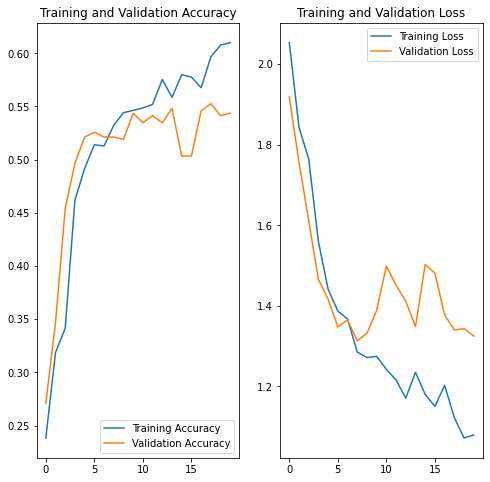

In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Less overfit than the previous run, training around 60% and validation @ 55ish%, loss is more similar. 

####  now looking at class make up
####  will be addressing class imbalance 

In [51]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [52]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,actinic keratosis
1,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,actinic keratosis
2,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,actinic keratosis
3,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,actinic keratosis
4,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,actinic keratosis
...,...,...
2234,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,vascular lesion
2235,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,vascular lesion
2236,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,vascular lesion
2237,C:\Users\cassa\OneDrive\Desktop\Skin cancer IS...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


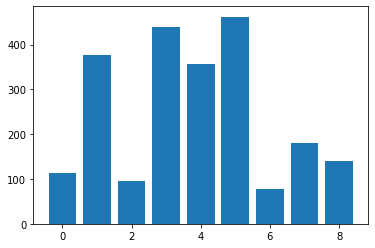

In [53]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

####  Class 3 & 5 & 1 & 4, respectively, are the mo robust classes. All of the aforementioned classes have over 300 samples fo rthe class while all of the others are no more than 200 and 6 & 2 are even below 100 samples. 


#### Rectify the class imbalance
#### updampling with  `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [54]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [56]:
path_to_training_dataset="C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B0429AC40>:   2%|▏         | 10/500 [00:00<01:01,  7.96 Samples/s]                 

Initialised with 114 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B01A41940>: 100%|██████████| 500/500 [00:03<00:00, 130.32 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B3449BAC0>:   2%|▏         | 11/500 [00:00<00:51,  9.46 Samples/s]                 

Initialised with 376 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B01AA03D0>: 100%|██████████| 500/500 [00:03<00:00, 128.02 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B3A96D190>:   0%|          | 2/500 [00:00<01:22,  6.00 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B345A1B80>: 100%|██████████| 500/500 [00:03<00:00, 137.54 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x27B3A9BA8E0>: 100%|██████████| 500/500 [00:19<00:00, 26.04 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x27B0429A610>: 100%|██████████| 500/500 [00:16<00:00, 30.57 Samples/s]                    
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B34617B80>:   1%|          | 5/500 [00:00<00:52,  9.46 Samples/s]                  

Initialised with 462 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B3AA41DC0>: 100%|██████████| 500/500 [00:03<00:00, 137.81 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x27B34329970>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x27B018CF3D0>: 100%|██████████| 500/500 [00:08<00:00, 61.15 Samples/s]                  
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x27B0D0060D0>:   1%|          | 5/500 [00:00<01:22,  5.97 Samples/s]

Initialised with 181 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B0CFE2BB0>: 100%|██████████| 500/500 [00:03<00:00, 135.46 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B3461BBE0>:   3%|▎         | 14/500 [00:00<01:03,  7.60 Samples/s]                  

Initialised with 139 image(s) found.
Output directory set to C:/Users/cassa/OneDrive/Desktop/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x27B0428C4F0>: 100%|██████████| 500/500 [00:03<00:00, 138.61 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [57]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [58]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['C:\\Users\\cassa\\OneDrive\\Desktop\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_197000dd-e6e0-4076-b4eb-c912e2907947.jpg',
 'C:\\Users\\cassa\\OneDrive\\Desktop\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_7c343cc8-9ca2-47a6-9c43-69aca76fb303.jpg',
 'C:\\Users\\cassa\\OneDrive\\Desktop\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_274191ba-0541-4f05-8b95-e9e084cee498.jpg',
 'C:\\Users\\cassa\\OneDrive\\Desktop\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_7c6c4fd5-3454-41f8-9b36-997f8f81fca9.jpg',
 'C:\\Users\\cassa\\OneDrive\\Desktop\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\

In [59]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [60]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [61]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [62]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor refined data

In [65]:
batch_size = 32
img_height = 180
img_width = 180

#### Training dataset

In [66]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## chose 'training'
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## chose validation
  image_size=(img_height, img_width),
  batch_size=batch_size)

#### Model Creation 1.1

In [76]:
## model w.o batch normalization and just a dropout of 0.2

#model = Sequential([
 # data_augmentation,
 # layers.experimental.preprocessing.Rescaling(1./255),
 # layers.Conv2D(16, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Conv2D(32, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Conv2D(64, 3, padding='same', activation='relu'),
 # layers.MaxPooling2D(),
 # layers.Dropout(0.2),
 # layers.Flatten(),
 # layers.Dense(128, activation='relu'),
 # layers.Dense(num_classes)
#])


#### model 1.2

In [72]:
## batch normalization has been added to model after dropout to avoid passing of data through normalization stats

#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
#val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#model = Sequential([
  #layers.experimental.preprocessing.Rescaling(1./255),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(32, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Conv2D(64, 3, padding='same', activation='relu'),
  #layers.MaxPooling2D(),
  #layers.Dropout(0.2),
  #layers.BatchNormalization(),
  #layers.Flatten(),
  #layers.Dense(128, activation='relu'),
  #layers.Dense(num_classes)
#])

#### model 1.3 

In [79]:
## adding bactchnorm after each convolution


AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.BatchNormalization(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.BatchNormalization(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### model compilation

In [80]:
## same optimizer and loss fxn as before

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Model training 

In [ ]:
## epochs now 30 from 20 in both initial training and without class imbalance being addressed

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 79s 460ms/step - loss: 2.1421 - accuracy: 0.2838 - val_loss: 9.8298 - val_accuracy: 0.1084
Epoch 2/30
169/169 [==============================] - 78s 464ms/step - loss: 1.4226 - accuracy: 0.4572 - val_loss: 7.0607 - val_accuracy: 0.1648
Epoch 3/30
169/169 [==============================] - 80s 471ms/step - loss: 1.1325 - accuracy: 0.5677 - val_loss: 2.3300 - val_accuracy: 0.4053
Epoch 4/30
169/169 [==============================] - 80s 475ms/step - loss: 0.8971 - accuracy: 0.6638 - val_loss: 1.3435 - val_accuracy: 0.5226
Epoch 5/30
169/169 [==============================] - 102s 605ms/step - loss: 0.7228 - accuracy: 0.7348 - val_loss: 1.0855 - val_accuracy: 0.6169
Epoch 6/30
169/169 [==============================] - 97s 574ms/step - loss: 0.5369 - accuracy: 0.8014 - val_loss: 1.6811 - val_accuracy: 0.5212
Epoch 7/30
169/169 [==============================] - 86s 510ms/step - loss: 0.4126 - accuracy: 0.8479 - val_loss: 2.5548 - val_a

####  Visualize the model results

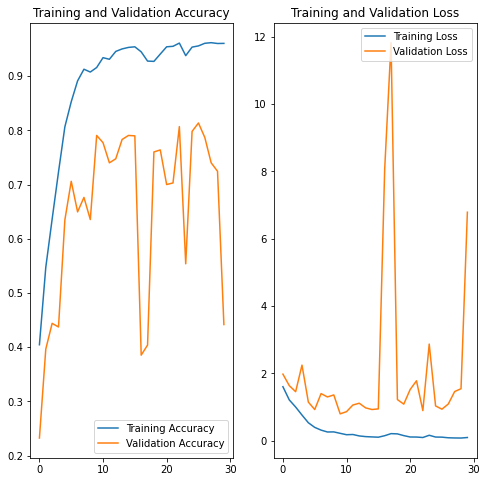

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### 1.1 Overall the class rebalance with augmentor's upsampling feature was extremely useful boasting a validation accuracy of ~80% with training above 90%. Could certainly be overfitting slightly since there is still technically a class imbalance but the samples were diluted with the upsampling. This was run without normalization following dropout in the model. 

#### 1.2 For the accuracy/loss plot of the 1.2 model with dropout and normalization the validation accuracy but batchnormalization was only implemented at teh end of the model after dropout but not after each convolution, validation accuracy was less steady, the training accuracy still appeared to be overfitted. 

#### 1.3 Training accuracy was a bit more withdrawn than previously being overfitted with percentages over 90%, this model settled more in the high 80s. For the validation accuracy there was less variation though throughout the epochs there was still less consistency than the first model 1.1

